In [245]:
place_codeA = [62]
place_codeB = [47772]
place_name = ["大阪"]   

year = ""
month = ""
day = ""

pre_year = 2021
nex_year = 2022
pre_month = 4
nex_month = 5
pre_day = 1
nex_day = 2

import requests
from bs4 import BeautifulSoup #ダウンロードしてなかったらpipでできるからやってね。
import csv

# URLで年と月ごとの設定ができるので%sで指定した英数字を埋め込めるようにします。
base_url = "http://www.data.jma.go.jp/obd/stats/etrn/view/10min_s1.php?prec_no=%s&block_no=%s&year=%s&month=%s&day=%s&view=p1"

#取ったデータをfloat型に変えるやつ。(データが取れなかったとき気象庁は"/"を埋め込んでいるから0に変える)
def str2float(str):
  try:
    return float(str)
  except:
    return 0.0


if __name__ == "__main__":
  #都市を網羅します
  for place in place_name:
    #最終的にデータを集めるリスト (下に書いてある初期値は一行目。つまり、ヘッダー。)
    All_list = [['年月日', '降水量(mm)','平均気温']]
    print(place)
    index = place_name.index(place)
    # for文で2016年~2021年までの11回。
    for year in range(pre_year,nex_year):
      print(str(year) + "年")
      # その年の1月~12月の12回を網羅する。
      for month in range(pre_month,nex_month):
        #2つの都市コードと年と月を当てはめる。
        print(str(month) + "月")
        # 31日で終わる月に対する処理
        if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
          for day in range(pre_day, nex_day):
            r = requests.get(base_url%(place_codeA[index], place_codeB[index], year, month,day))
            
            r.encoding = r.apparent_encoding
            # まずはサイトごとスクレイピング
            soup = BeautifulSoup(r.text)
            # findAllで条件に一致するものをすべて抜き出します。
            # 今回の条件はtrタグでclassがmtxになってるものです。
            rows = soup.findAll('tr',class_='mtx')
            # 表の最初の1~4行目はカラム情報なのでスライスする。(indexだから初めは0だよ)
            # 【追記】2020/3/11 申し訳ございません。間違えてました。
            rows = rows[2:]
            # 1日〜最終日までの１行を網羅し、取得します。
            for row in rows:
            # 今度はtrのなかのtdをすべて抜き出します
              data = row.findAll('td')
              #１行の中には様々なデータがあるので全部取り出す。
              # ★ポイント
              rowData = [] #初期化
              rowData.append(str(year) + "/" + str(month) + "/" + str(day) + "/" + str(data[0].string))
              #rowData.append(str2float(data[1].string))
              #rowData.append(str2float(data[2].string))
              rowData.append(str2float(data[3].string))
              rowData.append(str2float(data[4].string))
              #rowData.append(str2float(data[6].string))
              #rowData.append(str2float(data[9].string))
              #次の行にデータを追加
              All_list.append(rowData)

        elif month == 4 or month == 6 or month == 9 or month == 11:
          for day in range(pre_day, nex_day):
            r = requests.get(base_url%(place_codeA[index], place_codeB[index], year, month,day))

            r.encoding = r.apparent_encoding
            soup = BeautifulSoup(r.text)
            rows = soup.findAll('tr',class_='mtx')
            rows = rows[2:]
            for row in rows:
              data = row.findAll('td')
              rowData = [] 
              rowData.append(str(year) + "/" + str(month) + "/" + str(day) + "/" + str(data[0].string))
              #rowData.append(str2float(data[1].string))
              #rowData.append(str2float(data[2].string))
              rowData.append(str2float(data[3].string))
              rowData.append(str2float(data[4].string))
              #rowData.append(str2float(data[6].string))
              #rowData.append(str2float(data[9].string))
              All_list.append(rowData)
        else:
          if year % 4 == 0:
            for day in range(pre_day, nex_day):
              r = requests.get(base_url%(place_codeA[index], place_codeB[index], year, month,day))

              r.encoding = r.apparent_encoding
              soup = BeautifulSoup(r.text)
              rows = soup.findAll('tr',class_='mtx')
              rows = rows[2:]
              for row in rows:
                data = row.findAll('td')
                rowData = [] 
                rowData.append(str(year) + "/" + str(month) + "/" + str(day) + "/" + str(data[0].string))
                #rowData.append(str2float(data[1].string))
                #rowData.append(str2float(data[2].string))
                rowData.append(str2float(data[3].string))
                rowData.append(str2float(data[4].string))
                #rowData.append(str2float(data[6].string))
                #rowData.append(str2float(data[9].string))
                All_list.append(rowData)
          else:
            for day in range(pre_day, nex_day):
              r = requests.get(base_url%(place_codeA[index], place_codeB[index], year, month,day))

              r.encoding = r.apparent_encoding
              soup = BeautifulSoup(r.text)
              rows = soup.findAll('tr',class_='mtx')
              rows = rows[2:]
              for row in rows:
                data = row.findAll('td')
                rowData = [] 
                rowData.append(str(year) + "/" + str(month) + "/" + str(day) + "/" + str(data[0].string))
                #rowData.append(str2float(data[1].string))
                #rowData.append(str2float(data[2].string))
                rowData.append(str2float(data[3].string))
                rowData.append(str2float(data[4].string))
                #rowData.append(str2float(data[6].string))
                #rowData.append(str2float(data[9].string))
                All_list.append(rowData)

             


    #都市ごとにデータをファイルを新しく生成して書き出す。(csvファイル形式。名前は都市名)
    with open(place + '.csv', 'w') as file:
      writer = csv.writer(file, lineterminator='\n')
      writer.writerows(All_list)

大阪
2021年
4月


In [246]:
import pandas as pd

In [247]:
All_df=pd.DataFrame(data=All_list)
#0行目をcolumns用に取り出し
col=All_df.loc[0,:]

#0行目をcolumnsにしたDataFrame
all_data_df_p=pd.DataFrame(data=All_list, columns=col)
df=all_data_df_p

#DataFrameの作成と確認
all_data_df=df.drop(df.index[[0]])
print(all_data_df)

0               年月日 降水量(mm)  平均気温
1    2021/4/1/00:10     0.0  12.3
2    2021/4/1/00:20     0.0  12.3
3    2021/4/1/00:30     0.0  12.2
4    2021/4/1/00:40     0.0  12.0
5    2021/4/1/00:50     0.0  12.2
..              ...     ...   ...
140  2021/4/1/23:20     0.0  15.7
141  2021/4/1/23:30     0.0  15.5
142  2021/4/1/23:40     0.0  15.5
143  2021/4/1/23:50     0.0  15.4
144  2021/4/1/24:00     0.0  15.3

[144 rows x 3 columns]


In [248]:
df = pd.read_excel("status.xls")
df = df.iloc[[4,6,7], 1:]


WARNING *** file size (612221) not 512 + multiple of sector size (512)


In [249]:
df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251
4,【 2021/04/01 08:37 ～ 20...,08:37:11,08:38:11,08:39:11,08:40:11,08:41:11,08:42:11,08:43:11,08:44:11,08:45:11,...,12:37:21,12:38:21,12:39:21,12:40:21,12:41:21,12:42:21,12:43:21,12:44:22,12:45:22,12:46:22
6,LCX上り入力,-20.80,-20.80,-20.80,-20.80,-20.90,-20.80,-20.80,-20.90,-20.80,...,-22.70,-22.70,-22.70,-22.70,-22.70,-22.70,-22.70,-22.70,-22.60,-22.70
7,LCX下り入力,-16.80,-16.70,-16.70,-16.80,-16.80,-16.80,-16.70,-16.80,-16.80,...,-18.30,-18.40,-18.40,-18.40,-18.40,-18.40,-18.40,-18.40,-18.40,-18.40


In [250]:
t = df.iloc[0,0]
t = t[25:35]

In [251]:
print(t)

2021/04/01


In [252]:
if pre_day < 10 and pre_month < 10:
  t = t[0:5] + t[6:8] + t[9]
elif pre_day < 10 and pre_month >= 10:
  t = t[0:5] + t[6:9] + t[9]
elif pre_day >= 10 and pre_month < 10:
  t = t[0:5] + t[6:8] + t[8:11]
else:
  t = t[0:5] + t[6:9] + t[8:11]
print(t) 

2021/4/1


In [253]:
df = df.iloc[:,1:]

In [254]:
df

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251
4,08:37:11,08:38:11,08:39:11,08:40:11,08:41:11,08:42:11,08:43:11,08:44:11,08:45:11,08:46:11,...,12:37:21,12:38:21,12:39:21,12:40:21,12:41:21,12:42:21,12:43:21,12:44:22,12:45:22,12:46:22
6,-20.80,-20.80,-20.80,-20.80,-20.90,-20.80,-20.80,-20.90,-20.80,-20.80,...,-22.70,-22.70,-22.70,-22.70,-22.70,-22.70,-22.70,-22.70,-22.60,-22.70
7,-16.80,-16.70,-16.70,-16.80,-16.80,-16.80,-16.70,-16.80,-16.80,-16.90,...,-18.30,-18.40,-18.40,-18.40,-18.40,-18.40,-18.40,-18.40,-18.40,-18.40


In [255]:
print(len(df.columns))

250


In [256]:
for i in range(len(df.columns)):
  temp = t + '/' + df.iloc[0,i]
  df.iloc[0,i] = temp[:14]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [257]:
df = df.T

In [258]:
df = df.rename(columns={4: '年月日', 6:'LCX上り入力', 7:'LCX下り入力'})

In [259]:
df

,年月日,LCX上り入力,LCX下り入力
Unnamed: 2,2021/4/1/08:37,-20.80,-16.80
Unnamed: 3,2021/4/1/08:38,-20.80,-16.70
Unnamed: 4,2021/4/1/08:39,-20.80,-16.70
Unnamed: 5,2021/4/1/08:40,-20.80,-16.80
Unnamed: 6,2021/4/1/08:41,-20.90,-16.80
...,...,...,...
Unnamed: 247,2021/4/1/12:42,-22.70,-18.40
Unnamed: 248,2021/4/1/12:43,-22.70,-18.40
Unnamed: 249,2021/4/1/12:44,-22.70,-18.40
Unnamed: 250,2021/4/1/12:45,-22.60,-18.40


In [260]:
df = pd.merge(all_data_df, df,  
          how="inner", on = "年月日")

In [261]:
df

,年月日,降水量(mm),平均気温,LCX上り入力,LCX下り入力
0,2021/4/1/08:40,0.0,13.4,-20.80,-16.80
1,2021/4/1/08:50,0.0,14.1,-20.90,-16.90
2,2021/4/1/09:00,0.0,14.3,-21.00,-16.90
3,2021/4/1/09:10,0.0,14.5,-21.10,-16.80
4,2021/4/1/09:20,0.0,14.7,-21.30,-16.90
5,2021/4/1/09:30,0.0,15.2,-21.50,-17.00
6,2021/4/1/09:40,0.0,15.6,-21.60,-17.00
7,2021/4/1/09:50,0.0,15.7,-21.70,-17.00
8,2021/4/1/10:00,0.0,16.1,-21.70,-17.00
9,2021/4/1/10:10,0.0,17.1,-21.90,-17.20


LSTMに入力するためにデータを1次元numpy配列に変換

In [264]:
#平均気温
templature = df[["平均気温"]].values
templature = templature.reshape(-1)
templature = templature.astype(np.float64)

#降水量
rain = df[["降水量(mm)"]].values
rain = rain.reshape(-1)
rain = rain.astype(np.float64)

#LCX上り入力
lcxup = df[["LCX上り入力"]].values
lcxup = lcxup.reshape(-1)
lcxup = lcxup.astype(np.float64)

In [265]:
rain

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [266]:
lcxup

array([-20.8, -20.9, -21. , -21.1, -21.3, -21.5, -21.6, -21.7, -21.7,
       -21.9, -22. , -22.1, -22.1, -22.3, -22.2, -22.4, -22.4, -22.5,
       -22.5, -22.5, -22.5, -22.6, -22.6, -22.7, -22.7])

In [267]:
templature

array([13.4, 14.1, 14.3, 14.5, 14.7, 15.2, 15.6, 15.7, 16.1, 17.1, 17.1,
       17.4, 17.5, 18.2, 18.6, 19.4, 18.8, 18.7, 19.4, 19.6, 20.2, 20.4,
       21.1, 21.6, 21.1])

##LSTM実践編

In [269]:
#ライブラリインポート
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [273]:
# #データ準備(1次元のnumpy配列であれば良い)
# xdeg=1440
# x = np.arange(0,xdeg+1)
# sinx=np.sin(2*np.pi*x/360)+np.random.rand(len(x))/20
# sin2x=np.sin(2*2*np.pi*x/360)+np.random.rand(len(x))/20
# cosx=np.cos(2*np.pi*x/360)+np.random.rand(len(x))/20
# cos2x=np.cos(2*2*np.pi*x/360)+np.random.rand(len(x))/20
# X1=sinx
# X2=cosx
# X3=sin2x
# X4=cos2x
# Y1=X1+X2+X3+X4
# Y2=X1-X2+X3-X4

In [275]:
#データ準備
xdeg=24
x = np.arange(0,xdeg+1)
X1=templature
X2=rain
X3=lcxup
Y1=X3

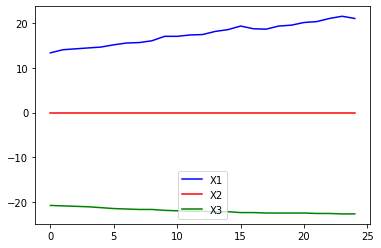

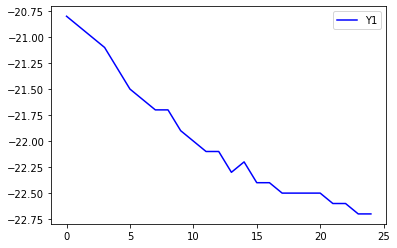

In [276]:
#入力データの可視化
plt.plot(range(0, len(x)), X1, color="b", label="X1")
plt.plot(range(0, len(x)), X2, color="r", label="X2")
plt.plot(range(0, len(x)), X3, color="g", label="X3")
#plt.plot(range(0, len(x)), X4, color="y", label="X4")
plt.legend()
plt.show()
plt.plot(range(0, len(x)), Y1, color="b", label="Y1")
#plt.plot(range(0, len(x)), Y2, color="r", label="Y2")
plt.legend()
plt.show()

In [277]:
#LSTM用にデータの前処理
X_list=[X1,X2,X3]
Y_list=[Y1]
Xdata=[]
Ydata=[]
look_back=5
for i in range(len(x)-look_back):
    Xtimedata=[]
    for j in range(len(X_list)):
        Xtimedata.append(X_list[j][i:i+look_back])
    Xtimedata=np.array(Xtimedata)
    Xtimedata=Xtimedata.transpose()
    Xdata.append(Xtimedata)
    Ytimedata=[]
    for j in range(len(Y_list)):
        Ytimedata.append(Y_list[j][i+look_back])
    Ydata.append(Ytimedata)
Xdata=np.array(Xdata)
Ydata=np.array(Ydata)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4)                 128       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 462.8816 - val_loss: 484.2664
Epoch 2/100
1/1 [==============================] - 0s 43ms/step - loss: 461.9069 - val_loss: 482.2811
Epoch 3/100
1/1 [==============================] - 0s 43ms/step - loss: 460.9848 - val_loss: 480.3365
Epoch 4/100
1/1 [==============================] - 0s 49ms/step - loss: 460.1139 - val_loss: 478.4767
Epoch 5/100
1/1 [=============================

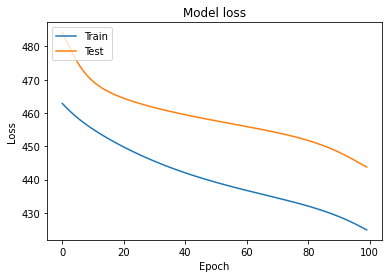

1/1 [==============================] - 0s 432ms/step


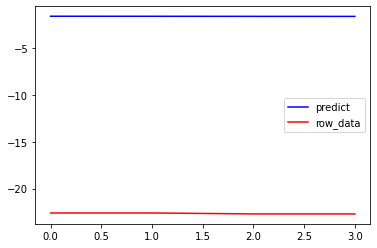

In [279]:
#LSTMモデルの構築⇒学習開始
Xdim=Xdata.shape[2]
Ydim=Ydata.shape[1]
validation_split_rate=0.2
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,Xdim)))
model.add(Dense(Ydim))
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.001))
model.summary()
history=model.fit(Xdata,Ydata,batch_size=16,epochs=100,validation_split=validation_split_rate)

#学習結果の可視化
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#精度検証
Xdata_validation=Xdata[-int(len(Xdata)*(validation_split_rate)):]
Ydata_validation=Ydata[-int(len(Ydata)*(validation_split_rate)):]
Predictdata = model.predict(Xdata_validation)
plt.plot(range(0, len(Predictdata)),Predictdata[:,0], color="b", label="predict")
plt.plot(range(0, len(Ydata_validation)),Ydata_validation[:,0], color="r", label="row_data")
plt.legend()
plt.show()

###以下のコードはサイトに載っていたソースコード
サイトURL[https://www.higashisalary.com/entry/lstm-some-inout-data]

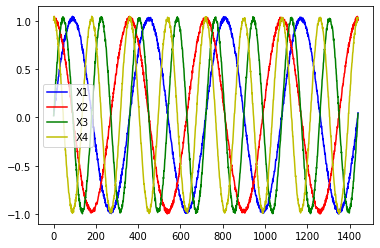

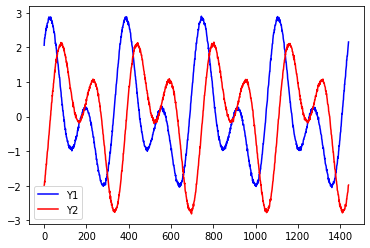

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 144       
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
Total params: 154
Trainable params: 154
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
72/72 [==============================] - 3s 12ms/step - loss: 1.9231 - val_loss: 1.2587
Epoch 2/100
72/72 [==============================] - 0s 6ms/step - loss: 1.5295 - val_loss: 0.9647
Epoch 3/100
72/72 [==============================] - 1s 8ms/step - loss: 1.1123 - val_loss: 0.6966
Epoch 4/100
72/72 [==============================] - 1s 8ms/step - loss: 0.7383 - val_loss: 0.4903
Epoch 5/100
72/72 [==============================] - 1s 8

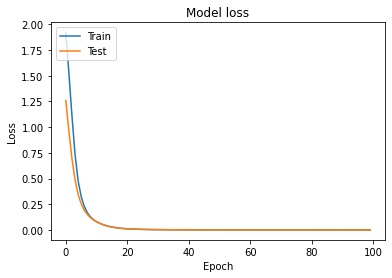

9/9 [==============================] - 0s 3ms/step


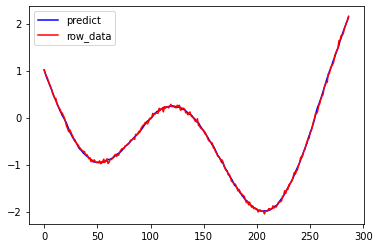

In [ ]:
#ライブラリインポート
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

#データ準備
xdeg=1440
x = np.arange(0,xdeg+1)
sinx=np.sin(2*np.pi*x/360)+np.random.rand(len(x))/20
sin2x=np.sin(2*2*np.pi*x/360)+np.random.rand(len(x))/20
cosx=np.cos(2*np.pi*x/360)+np.random.rand(len(x))/20
cos2x=np.cos(2*2*np.pi*x/360)+np.random.rand(len(x))/20
X1=sinx
X2=cosx
X3=sin2x
X4=cos2x
Y1=X1+X2+X3+X4
Y2=X1-X2+X3-X4

#入力データの可視化
plt.plot(range(0, len(x)), X1, color="b", label="X1")
plt.plot(range(0, len(x)), X2, color="r", label="X2")
plt.plot(range(0, len(x)), X3, color="g", label="X3")
plt.plot(range(0, len(x)), X4, color="y", label="X4")
plt.legend()
plt.show()
plt.plot(range(0, len(x)), Y1, color="b", label="Y1")
plt.plot(range(0, len(x)), Y2, color="r", label="Y2")
plt.legend()
plt.show()

#LSTM用にデータの前処理
X_list=[X1,X2,X3,X4]
Y_list=[Y1,Y2]
Xdata=[]
Ydata=[]
look_back=5
for i in range(len(x)-look_back):
    Xtimedata=[]
    for j in range(len(X_list)):
        Xtimedata.append(X_list[j][i:i+look_back])
    Xtimedata=np.array(Xtimedata)
    Xtimedata=Xtimedata.transpose()
    Xdata.append(Xtimedata)
    Ytimedata=[]
    for j in range(len(Y_list)):
        Ytimedata.append(Y_list[j][i+look_back])
    Ydata.append(Ytimedata)
Xdata=np.array(Xdata)
Ydata=np.array(Ydata)

#LSTMモデルの構築⇒学習開始
Xdim=Xdata.shape[2]
Ydim=Ydata.shape[1]
validation_split_rate=0.2
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,Xdim)))
model.add(Dense(Ydim))
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.001))
model.summary()
history=model.fit(Xdata,Ydata,batch_size=16,epochs=100,validation_split=validation_split_rate)

#学習結果の可視化
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#精度検証
Xdata_validation=Xdata[-int(len(Xdata)*(validation_split_rate)):]
Ydata_validation=Ydata[-int(len(Ydata)*(validation_split_rate)):]
Predictdata = model.predict(Xdata_validation)
plt.plot(range(0, len(Predictdata)),Predictdata[:,0], color="b", label="predict")
plt.plot(range(0, len(Ydata_validation)),Ydata_validation[:,0], color="r", label="row_data")
plt.legend()
plt.show()